<h1> Importando Bibliotecas que serão utilizadas para desenvolver as análises <h1>

In [35]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport


### Importando a planilha da pasta para realizar a análise e tratamento de dados. Coloquei em ordem pela coluna 'UDI'

In [32]:
treino_df = pd.read_csv(r'C:\Users\BlueShift\Documents\light\desafio_manutencao_preditiva_treino.csv')
ordena = treino_df.sort_values(by='udi')
display(ordena)

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


### Usei um "info" no dataframe para verificar os tipos e se não haviam nenhuma linha vazia na coluna.

In [16]:
treino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


### Utilizei um "unique" só para verificar as distinções que tem na coluna "failure_type". 
### E também coloquei abaixo as traduções dos erros.

In [17]:
print(treino_df["failure_type"].unique())

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


No Failure = sem falhas                                   6435
Heat Dissipation Failure = falha de dissipação de calor    75
Power Failure = falha de energia                           63
Overstrain Failure = falhas de sobrecarga                  52
Tool Wear Failure = falhas de desgastes da ferramenta      30
Random Failures = falhas aleatórias                        12

### Também utilizei um "value_counts" para me trazer como resultado a soma de cada tipo de falha. Usei um "plot"   

No Failure                  6435
Heat Dissipation Failure      75
Power Failure                 63
Overstrain Failure            52
Tool Wear Failure             30
Random Failures               12
Name: failure_type, dtype: int64

<AxesSubplot:xlabel='failure_type', ylabel='Percentagem'>

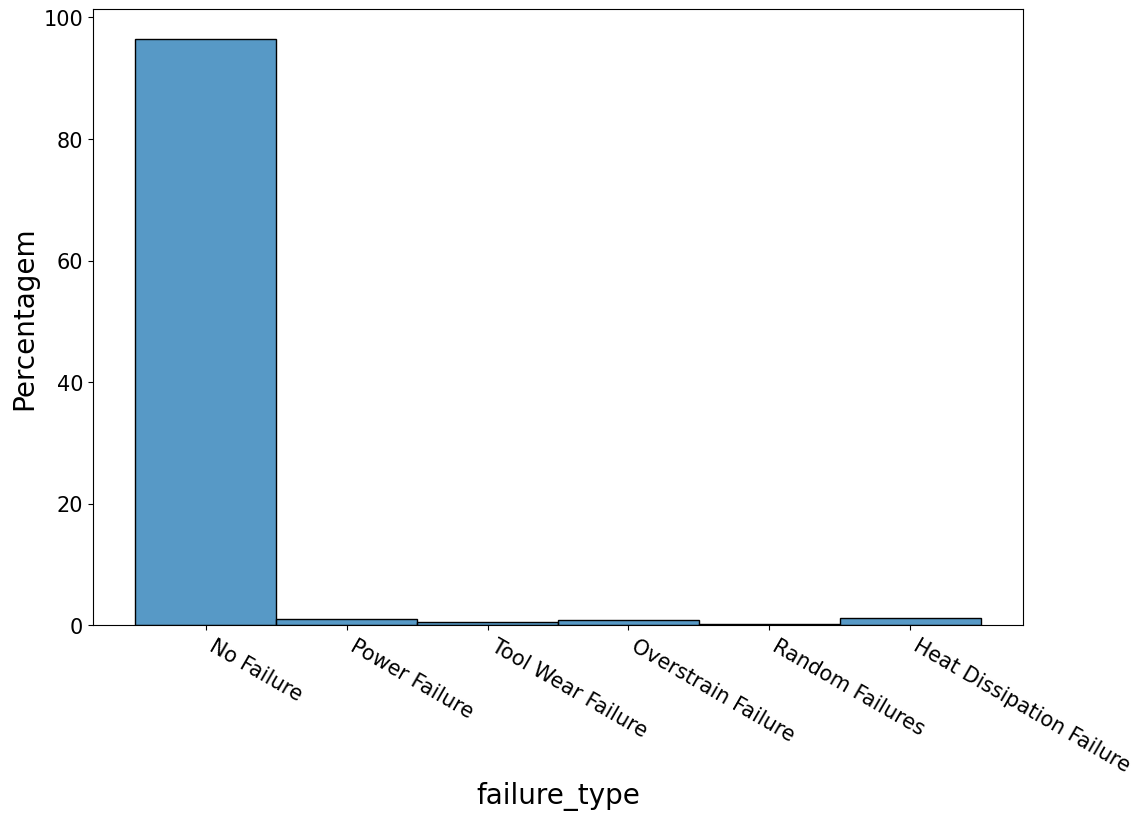

In [45]:
falhas = treino_df['failure_type'].value_counts()
display(falhas)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('failure_type', fontsize=20)
ax.set_ylabel('Percentagem', fontsize=20)
ax.tick_params(which='both', labelsize=15)
plt.xticks(rotation=-30, ha='left')
sns.histplot(treino_df, x='failure_type', stat='percent')

### Utilizando o "ProfileReport" para explorar mais afundos os dados e ver sua relevancia para a análise.

In [37]:
profile = ProfileReport(treino_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Removi as colunas 'udi' e 'product_id' pois elas são compostas por valores "unique" que não são relevantes para a análise, além do "product id" ter alta cardinalidade. Em Overview e aba "Alerts", indica as informações.

In [48]:
treino_df_mod = treino_df.drop(['udi', 'product_id'], axis=1)
treino_df_mod[:5]

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.2,308.7,1408,40.0,9,No Failure
3,M,298.1,308.6,1425,41.9,11,No Failure
4,L,298.1,308.6,1558,42.4,14,No Failure
